In [42]:
import scanpy as sc
from collections import Counter

In [3]:
# loading the filtered adata
adata3 = sc.read("/home/jovyan/ifbdata/spatial_cell_id/Kush/Scanpy_analysis/adata_filtered.h5ad")

In [4]:
adata_dataset = adata3.copy()

In [5]:
sc.pp.scrublet(adata_dataset, batch_key="Dataset")

In [7]:
# Saving count data
adata_dataset.layers["counts"] = adata_dataset.X.copy()

In [8]:
# Normalizing to median total counts
sc.pp.normalize_total(adata_dataset)
# Logarithmize the data
sc.pp.log1p(adata_dataset)

In [9]:
sc.pp.highly_variable_genes(adata_dataset, n_top_genes=2000, batch_key="Dataset")

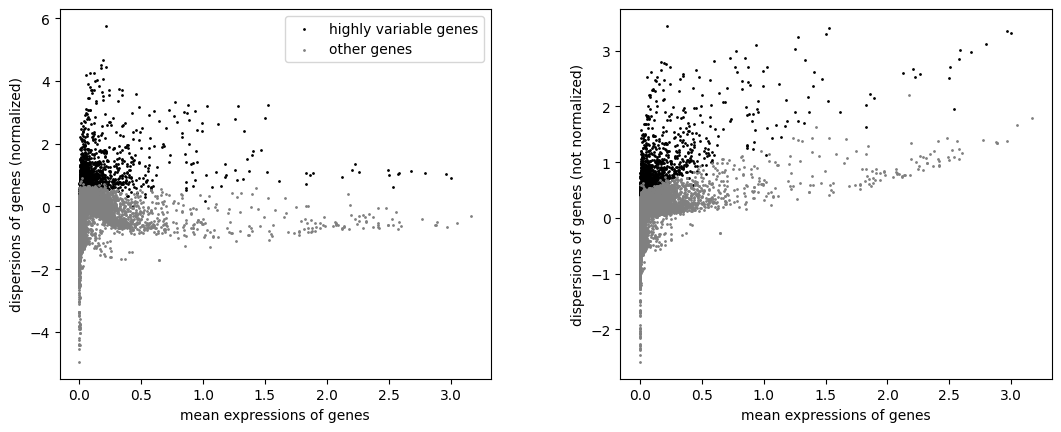

In [10]:
sc.pl.highly_variable_genes(adata_dataset)

In [12]:
sc.tl.pca(adata_dataset)

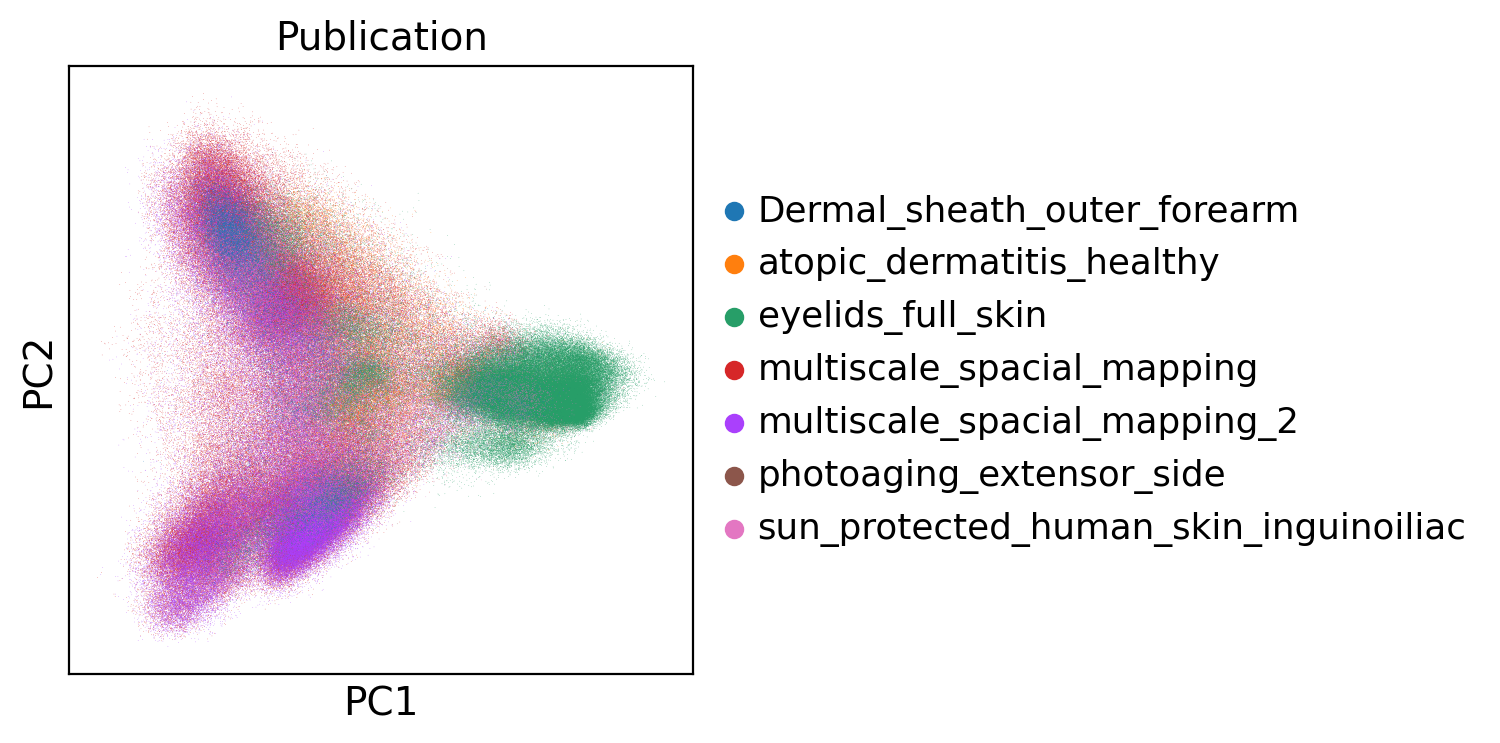

In [18]:
sc.settings.set_figure_params(dpi = 100, facecolor='white')
sc.pl.pca(adata_dataset, color='Publication')

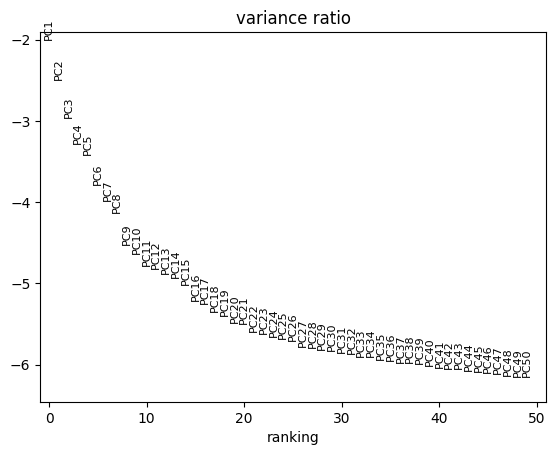

In [13]:
sc.pl.pca_variance_ratio(adata_dataset, n_pcs=50, log=True)

In [15]:
sc.pp.neighbors(adata_dataset, n_neighbors=10, n_pcs=40)

/opt/conda/envs/spatialdata/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/opt/conda/envs/spatialdata/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
sc.tl.umap(adata_dataset)

In [20]:
sc.tl.leiden(adata_dataset, flavor="igraph", n_iterations=2)

In [22]:
# sc.pl.umap(adata_dataset, color=["leiden"])

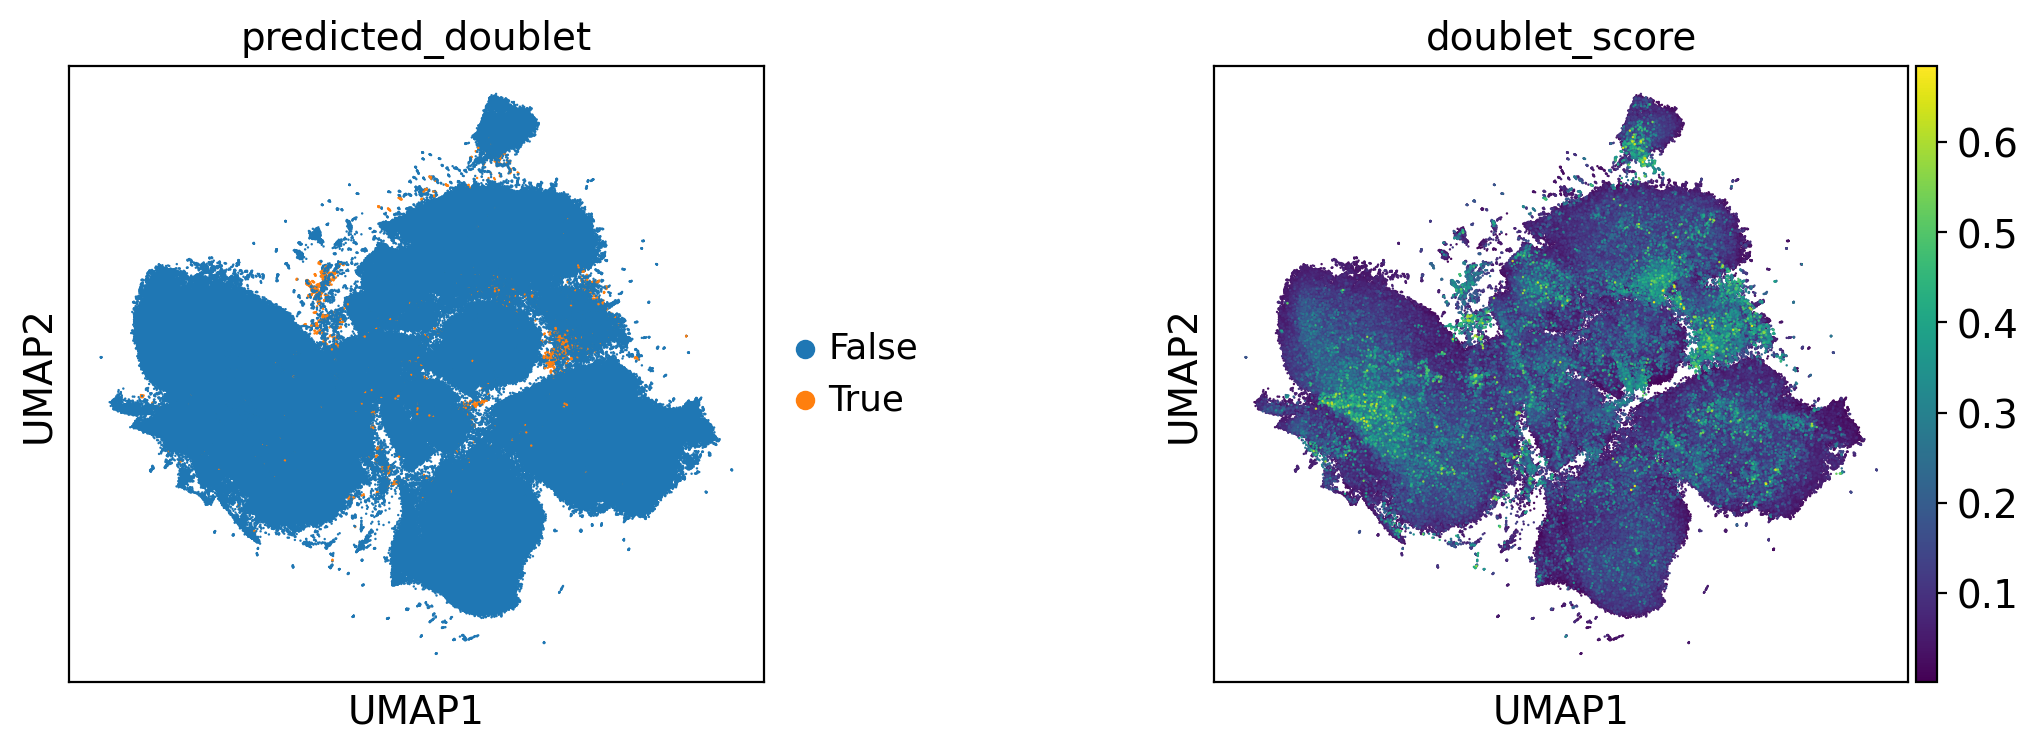

In [23]:
sc.pl.umap(
    adata_dataset,
    color=["predicted_doublet", "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
)

In [ ]:
d = [i for i in adata_dataset.obs['predicted_doublet'].values]

In [33]:
count = 0
for item in d:
    if item == True:
        count+=1

In [34]:
count

3911

In [36]:
3911/len(adata_dataset)

0.00564118541340326

In [41]:
True_cases = adata_dataset.obs['predicted_doublet'] == True
result = adata_dataset.obs.loc[True_cases, 'Dataset']
result_2 = adata_dataset.obs.loc[True_cases, 'Publication']
result_list = result.tolist()
result_list_2 = result_2.tolist()

In [60]:
dataset_doublets = Counter(result_list)
# print(dataset_doublets)
for key in dataset_doublets:
    percentage_doublet_cells = (dataset_doublets[key]/(adata3[adata3.obs['Dataset'] == key].n_obs))*100
    dataset_doublets[key] = (dataset_doublets[key], percentage_doublet_cells)
dataset_doublets

Counter({'WS_SKN_KCL9369628_S3': (532, 4.0713247111043085),
         'WS_SKN_KCL9369628_S4': (525, 4.050300879493905),
         'WS_SKN_KCL9369628_S2': (454, 3.5253921416369),
         'WS_SKN_KCL9369628_S1': (435, 3.33512228781722),
         'WS_SKN_KCL9369632_S2': (175, 3.278381416260772),
         'WS_SKN_KCL9369625_S4': (170, 2.067874954385111),
         'WS_SKN_KCL9369632_S4': (163, 3.0123821844391054),
         'WS_SKN_KCL9369632_S3': (160, 2.9979389169945665),
         'WS_SKN_KCL9369632_S1': (159, 3.0022658610271904),
         'HRR172220': (153, 2.671555788370875),
         'HRR172218': (149, 2.6900162484202927),
         'WS_SKN_KCL9369625_S3': (142, 1.7151829931151104),
         'HRR172219': (126, 2.1947395924055044),
         'WS_SKN_KCL9369631_S3': (107, 1.9426289034132171),
         'HRR172217': (90, 1.6471449487554906),
         'WS_SKN_KCL9369631_S4': (87, 1.6228315612758812),
         'WS_SKN_KCL9369631_S2': (82, 1.5381729506659163),
         'SRR15440580': (26, 7.28291

In [44]:
Counter(result_list_2)

Counter({'multiscale_spacial_mapping': 2615,
         'multiscale_spacial_mapping_2': 648,
         'eyelids_full_skin': 570,
         'Dermal_sheath_outer_forearm': 42,
         'photoaging_extensor_side': 15,
         'atopic_dermatitis_healthy': 14,
         'sun_protected_human_skin_inguinoiliac': 7})

In [76]:
adata_dataset.write('/home/jovyan/ifbdata/spatial_cell_id/Kush/Scanpy_analysis/adata_doublet_info.h5ad')